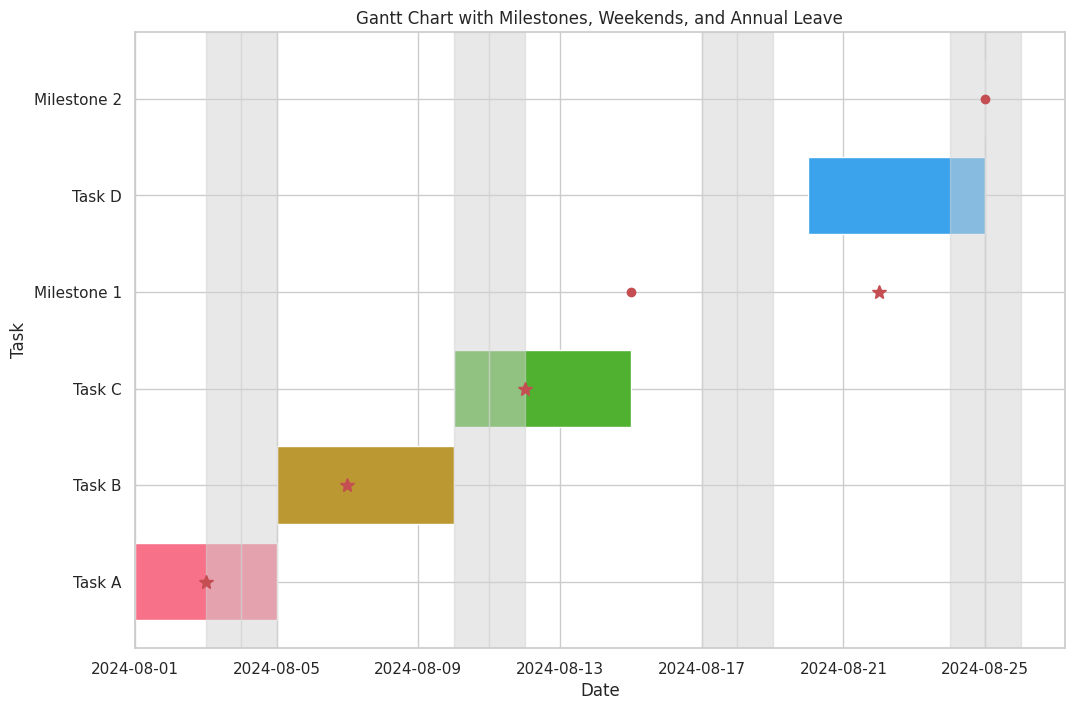

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Task': ['Task A', 'Task B', 'Task C', 'Milestone 1', 'Task D', 'Milestone 2'],
    'Start': ['2024-08-01', '2024-08-05', '2024-08-10', '2024-08-15', '2024-08-20', '2024-08-25'],
    'End': ['2024-08-05', '2024-08-10', '2024-08-15', '2024-08-15', '2024-08-25', '2024-08-25'],
    'Annual Leave': ['2024-08-03', '2024-08-07', '2024-08-12', None, '2024-08-22', None]
}

# Create DataFrame
df = pd.DataFrame(data)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['Annual Leave'] = pd.to_datetime(df['Annual Leave'])

# Define a color palette
colors = sns.color_palette("husl", len(df['Task']))

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a bar plot for tasks with different colors
for i, task in enumerate(df['Task']):
    plt.barh(task, (df['End'][i] - df['Start'][i]).days, left=df['Start'][i], color=colors[i])

# Highlight milestones
milestones = df[df['Task'].str.contains('Milestone')]
for index, row in milestones.iterrows():
    plt.plot(row['Start'], row['Task'], 'ro')

# Highlight weekends
for i in range((df['Start'].min() - pd.to_datetime('2024-08-01')).days, (df['End'].max() - pd.to_datetime('2024-08-01')).days + 1):
    date = pd.to_datetime('2024-08-01') + pd.Timedelta(days=i)
    if date.weekday() >= 5:  # Saturday and Sunday
        plt.axvspan(date, date + pd.Timedelta(days=1), color='lightgrey', alpha=0.5)

# Highlight annual leave with stars
for i, leave in enumerate(df['Annual Leave'].dropna()):
    plt.plot(leave, df['Task'][i], 'r*', markersize=10)

plt.xlabel('Date')
plt.ylabel('Task')
plt.title('Gantt Chart with Milestones, Weekends, and Annual Leave')
plt.show()


In [2]:
#DataFrame Attributes
#1. df.index
#return the inex (row labels) of the dataFrame

import pandas as pd

people = {
    "Name" : ["Jaume", "Paula", "David","Berta"],
    "Age" : [25,34,46,40],
    "City" : ["Barcelona", "Valencia", "Cadiz","Bilbao"],
    "Profession" : ["Engineer", "Doctor", "Artist", "Teacher"]
}
df = pd.DataFrame(people)

df.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
# 2. df.columns
# return the column labels of the DataFrame

import pandas as pd

df = pd.DataFrame(people)

df.columns

Index(['Name', 'Age', 'City', 'Profession'], dtype='object')

In [10]:
# 3. df.dtypes
# return the dtypes in the DataFrame

import pandas as pd

teens = {
    "name" : ["Marc","Blance","Nadia"],
    "age" : [16,14,15],
    "height" : [509,6.0,5.7],
    "is_student" : [True, False, True],
}

df = pd.DataFrame(teens)

df.dtypes

name           object
age             int64
height        float64
is_student       bool
dtype: object

In [11]:
# 4. df.select_dtypes()
# Return a subset of the DataFrame's columns based on the column dtypes.

import pandas as pd

teens = {
    "name" : ["Marc","Blance","Nadia"],
    "age" : [16,14,15],
    "height" : [509,6.0,5.7],
    "is_student" : [True, False, True],
}

df = pd.DataFrame(teens)

df.select_dtypes(include = "bool")

,is_student
0,True
1,False
2,True


In [12]:
# 5. df.shape
# representing the dimensionality(rows, cols) of the DataFrame

import pandas as pd

teens = {
    "name" : ["Marc","Blance","Nadia"],
    "age" : [16,14,15],
    "height" : [509,6.0,5.7],
    "is_student" : [True, False, True],
}

df = pd.DataFrame(teens)

df.shape

(3, 4)

In [13]:
df.size
#Returns the total number of elements in DataFrame (rows*columns)

12

In [14]:
df.ndim
#Return the number of dimensions of the DataFrame.

2

In [16]:
df.empty
# Return True if the DataFrame is empty (has no elements), otherwise False

False

In [17]:
df.axes
# Returns a list representing the axes (row and column labels of the DataFrame

[RangeIndex(start=0, stop=3, step=1),
 Index(['name', 'age', 'height', 'is_student'], dtype='object')]

In [18]:
# df.info

planets = {
    'planet' : ['Mercury','Jupyter', 'Neptune'],
    'distancefromsun (AU)' : [0.39,5.20, None],
    'type' : ['Terrestrial', 'Gas Giant','Ice Giant']
}

df = pd.DataFrame(planets)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   planet                3 non-null      object 
 1   distancefromsun (AU)  2 non-null      float64
 2   type                  3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


In [19]:
#Underlying Data
# 1. df.to_numpy()
# convert the DataFrame to a Numpy array

import pandas as pd

teens = {
    "name" : ["Marc","Blance","Nadia"],
    "age" : [16,14,15],
    "height" : [509,6.0,5.7],
    "is_student" : [True, False, True],
}

df = pd.DataFrame(teens)

df.to_numpy()

array([['Marc', 16, 509.0, True],
       ['Blance', 14, 6.0, False],
       ['Nadia', 15, 5.7, True]], dtype=object)

In [21]:
df.memory_usage()

Index         128
name           24
age            24
height         24
is_student      3
dtype: int64